# Exercise 3: Use a learning rate for updating the weights and bias unit

## 1) Installing Libraries

In [1]:
# !conda install numpy pandas matplotlib --yes

In [2]:
# !conda install watermark

In [3]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

numpy     : 1.26.4
pandas    : 2.2.3
matplotlib: 3.9.2



## 2) Loading the Dataset

In [4]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [5]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [6]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [7]:
X_train.shape

(20, 2)

In [8]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
y_train.shape

(20,)

In [10]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

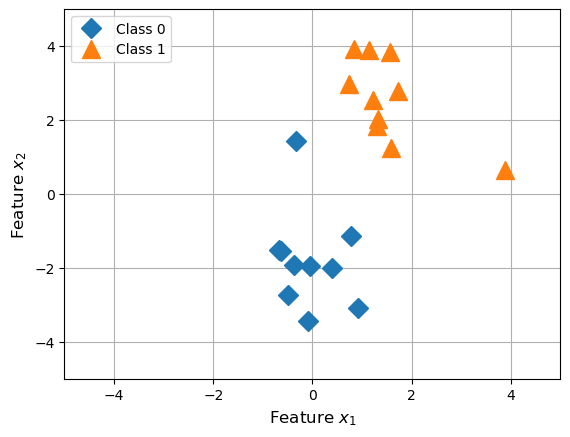

In [12]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

In [17]:
import random

random.uniform(-0.5, 0.5)

0.23462375519574952

# <font color='red'>Exercise 3.1</font>

<font color='red'>Modify the Perceptron class below such that it uses a so-called *learning rate* for updating the weights and bias unit. The learning rate, let's call it `alpha` is a positive float that scales the weight update. I.e., in the code below, multiply the bias and weight update by a variable `alpha` which defaults to 1.0. (Hint: don't forget to modify the `__init__` method such that it accepts different values for `alpha`.</font>

In [21]:
class Perceptron:
    def __init__(self, num_features, alpha=1.0):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0
        self.alpha = alpha

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += self.alpha * error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.alpha * error * x[i]

        return error

In [22]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

# <font color='red'>Exercise 3.2</font>

<font color='red'>Now, modify the code below to train the perceptron with a learning rate of `alpha=1.0`. Since we are multiplying the weight and bias update by 1.0, we should get exactly the same results as in the original code.</font>

In [24]:
ppn = Perceptron(num_features=2, alpha=1.0)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)
print("\nWeights:", ppn.weights)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Epoch 4 errors 0
Epoch 5 errors 0

Weights: [2.86, 1.98]


# <font color='red'>Exercise 3.3</font>

<font color='red'>What do you observe? Does the perceptron train better or worse?</font>

SOLUTION: The results are unchanged as we expected.

# <font color='red'>Exercise 3.4</font>

<font color='red'>
Now, change the learning rate from `alpha=1.0` to `alpha=0.5` and train the perceptron again. What do you observe?
</font>


In [25]:
# SOLUTION CODE
ppn = Perceptron(num_features=2, alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

print("\nWeights:", ppn.weights)

Epoch 1 errors 1
Epoch 2 errors 3
Epoch 3 errors 1
Epoch 4 errors 0
Epoch 5 errors 0

Weights: [1.43, 0.99]


SOLUTION: The results are still unchanges, which is probably not what you expected. (The explanation will follow later.)

PS: If you printed the weights, you can observe that using `alpha=0.5` will result in weights that are exactly half as large.

# <font color='red'>Exercise 3.5</font>

<font color='red'>
Next, update the Perceptron code with small random weights (solution of exercise 2). 
</font>

<br>

<font color='red'>
Then, train the perceptron again with a learning rate of 1.0 and 0.5 and compare the results.
</font>

In [26]:
import random

class PerceptronRandom:
    def __init__(self, num_features, alpha=1.0):
        random.seed(123)
        self.num_features = num_features
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5, 0.5)
        self.alpha = alpha

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += self.alpha * error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.alpha * error * x[i]

        return error

In [27]:
# SOLUTION CODE
ppn = PerceptronRandom(num_features=2, alpha=1.0)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

print("\nWeights:", ppn.weights)

Epoch 1 errors 4
Epoch 2 errors 1
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0

Weights: [3.8123635988509443, 1.2371866775226326]


In [28]:
# SOLUTION CODE
ppn = PerceptronRandom(num_features=2, alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

print("\nWeights:", ppn.weights)

Epoch 1 errors 2
Epoch 2 errors 2
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0

Weights: [0.8873635988509443, 0.3321866775226323]


SOLUTION: You can see that when we use random weights, the learning rate DOES affect the training outcome.
    
PS: If you printed the weights, you can observe that using `alpha=0.5` will NOT result in weights that are exactly half as large.    

The learning rate only affects decision boundary if the weights are NOT initialized to zero. If we initialize the weights to all zero, the learning rate only affects the scale of the weight vector, not the direction.

## 5) Evaluating the results

In [29]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [30]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [31]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


## 6) Optional: Visualizing the Decision Boundary

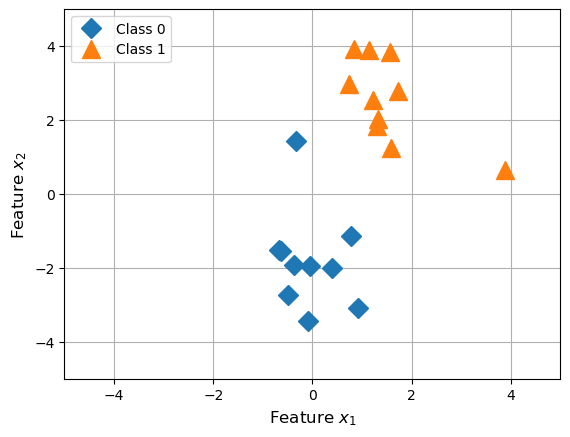

In [32]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [33]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

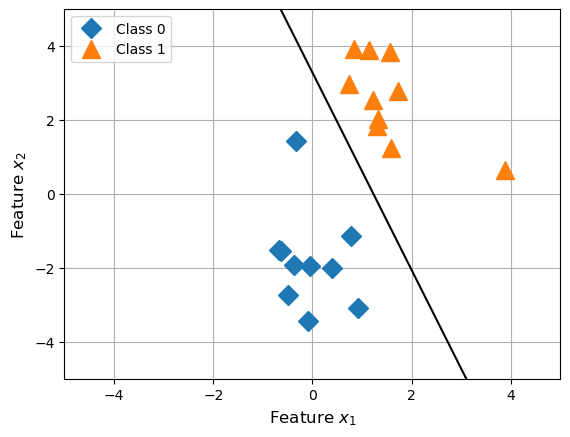

In [34]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()